# Antarctic Shelf Density
This scipt ...

In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import IPython.display
import cmocean as cm
import cftime

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

import sys, os

## To deal with memory issues:
* In a terminal on VDI (either over VNC or through SSH and inside screen/tmux), run:
`dask-scheduler`
* This should output the scheduler address, like `tcp://10.0.64.24:8786`. 
* Now, in another terminal (ensuring that the default conda module has cosima_cookbook installed, as all workers will need access to that), run:
`dask-worker tcp://10.0.64.24:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157`
* Then, make sure the following cell matches the scheduler address.

In [2]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.14:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.14:8786', local_dir='/local/g40/amh157')
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:40660 Dashboard: http://127.0.0.1:38949/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [3]:
expts = [#'01deg_jra55v13_ryf8485_spinup6',
         #'01deg_jra55v13_ryf8485_spinup7',
         #'01deg_jra55v13_ryf8485_spinup9',
         '01deg_jra55v13_ryf8485_spinup10',
         '01deg_jra55v13_ryf8485_spinup11'
        ]
db = '/g/data3/hh5/tmp/cosima/database/access-om2.db'

Calculating density for Year  1
CPU times: user 24.5 s, sys: 4.83 s, total: 29.3 s
Wall time: 1min


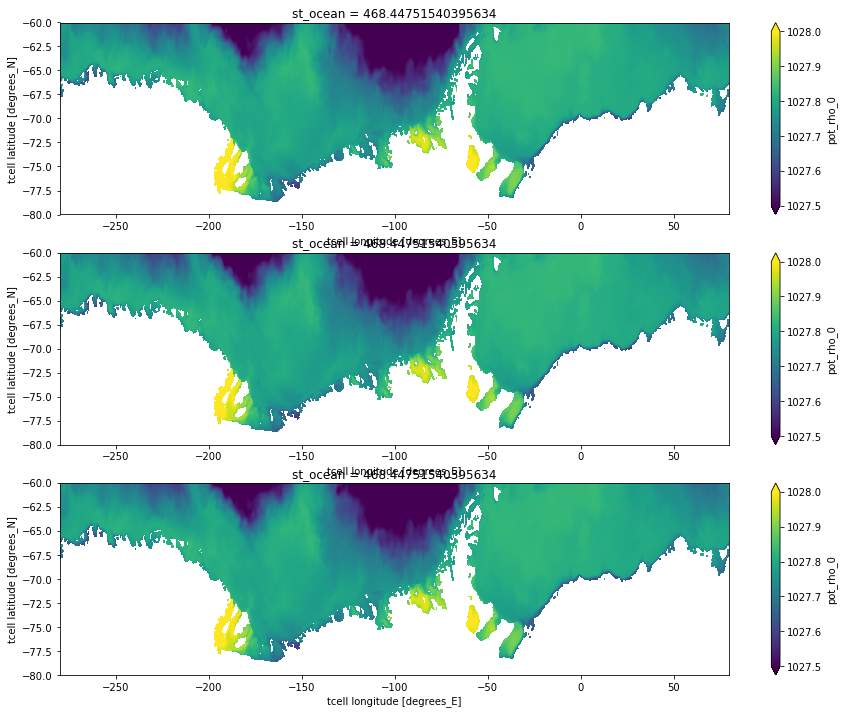

In [29]:
%%time
year = 1
print('Calculating density for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
rho = cc.querying.getvar(expt,'pot_rho_0',db).sel(st_ocean = 450,method='nearest')
rho = rho.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
rho=rho.mean('time')
plt.subplot(3,1,ii)
rho.plot(vmin=1027.5,vmax=1028)
for expt in expts:
    ii+=1
    rho = cc.querying.getvar(expt,'pot_rho_0',db).sel(st_ocean = 450,method='nearest')
    rho = rho.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    rho = rho.mean('time')
    plt.subplot(3,1,ii)
    rho.plot(vmin=1027.5,vmax=1028)
    

Calculating density for Year  4
CPU times: user 14.6 s, sys: 2.37 s, total: 17 s
Wall time: 1min


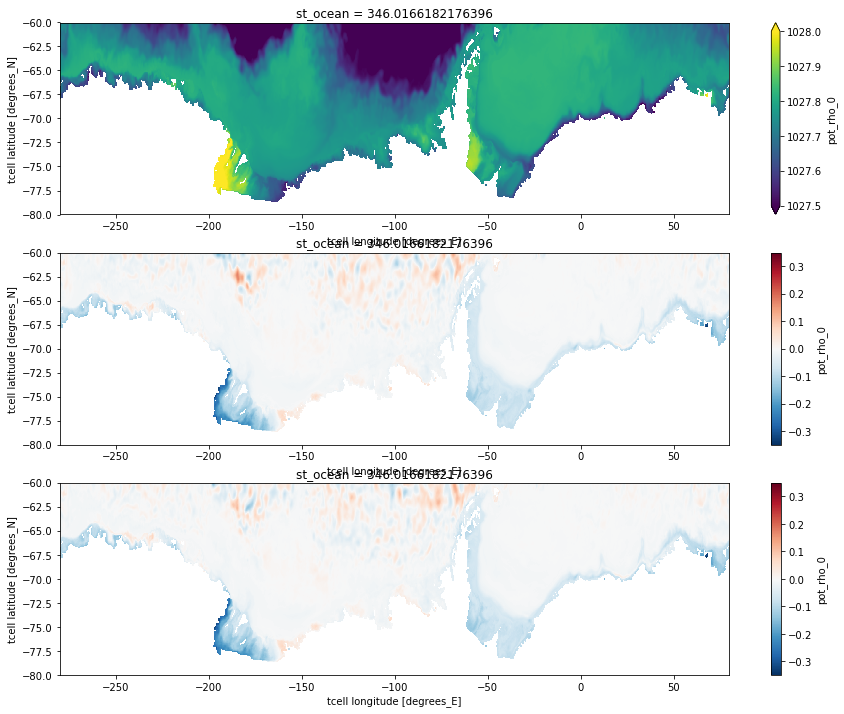

In [32]:
%%time
year = 4
print('Calculating density for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
rho = cc.querying.getvar(expt,'pot_rho_0',db).sel(st_ocean = 350,method='nearest')
rho = rho.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
rho6=rho.mean('time')
plt.subplot(3,1,ii)
rho6.plot(vmin=1027.5,vmax=1028)
for expt in expts:
    ii+=1
    rho = cc.querying.getvar(expt,'pot_rho_0',db).sel(st_ocean = 350,method='nearest')
    rho = rho.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    rho = rho.mean('time') - rho6
    plt.subplot(3,1,ii)
    rho.plot()

Calculating temperature for Year  1


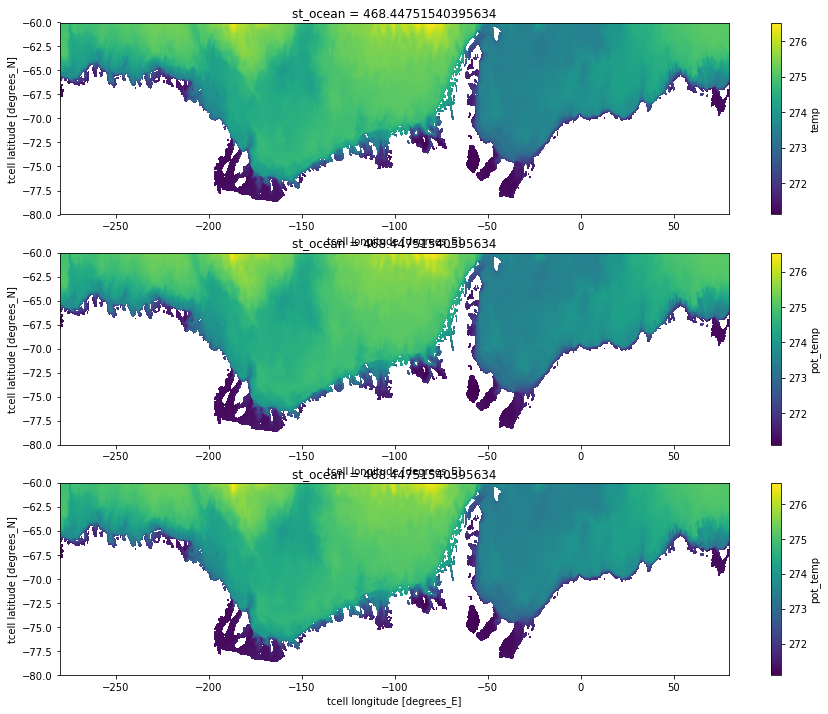

In [4]:
year = 1
print('Calculating temperature for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
temp = cc.querying.getvar(expt,'temp',db,n=100).sel(st_ocean = 450,method='nearest')
temp = temp.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
temp=temp.mean('time')
plt.subplot(3,1,ii)
temp.plot()
for expt in expts:
    ii+=1
    temp = cc.querying.getvar(expt,'pot_temp',db).sel(st_ocean = 450,method='nearest')
    temp = temp.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    temp = temp.mean('time')
    plt.subplot(3,1,ii)
    temp.plot()

Calculating temperature for Year  4


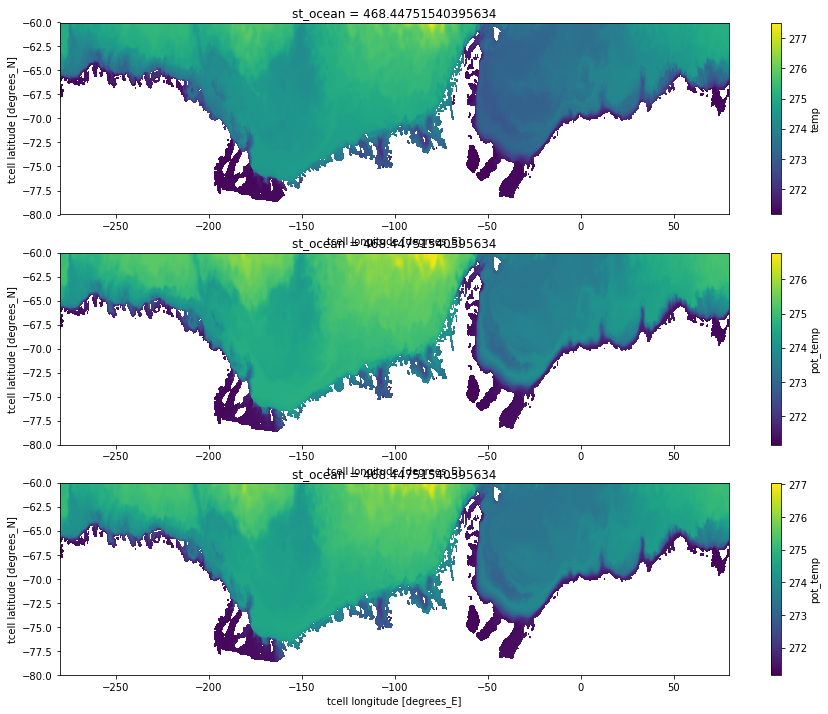

In [5]:
year = 4
print('Calculating temperature for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
temp = cc.querying.getvar(expt,'temp',db,n=100).sel(st_ocean = 450,method='nearest')
temp = temp.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
temp=temp.mean('time')
plt.subplot(3,1,ii)
temp.plot()
for expt in expts:
    ii+=1
    temp = cc.querying.getvar(expt,'pot_temp',db).sel(st_ocean = 450,method='nearest')
    temp = temp.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    temp = temp.mean('time')
    plt.subplot(3,1,ii)
    temp.plot()

Calculating salinity for Year  1


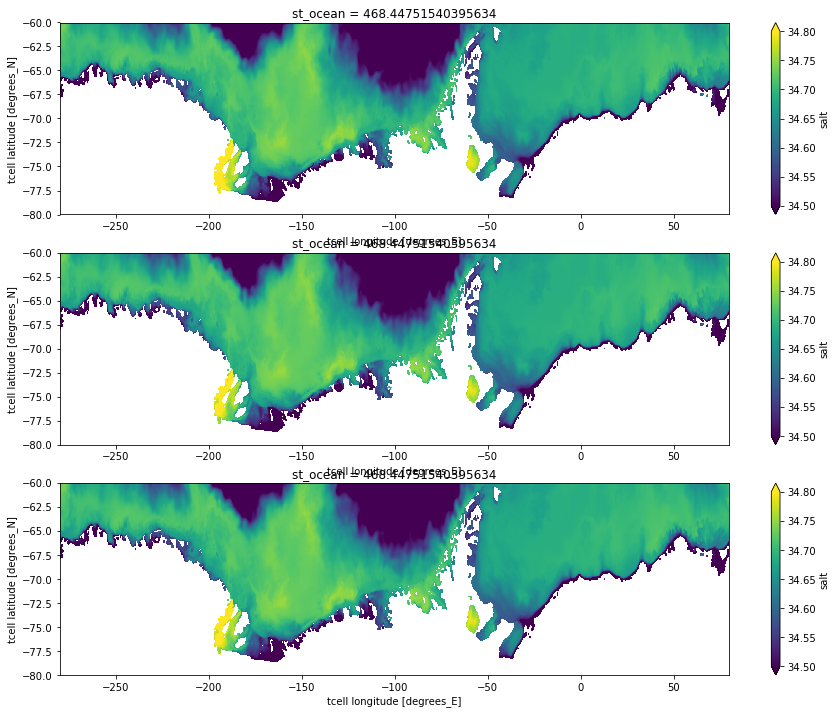

In [10]:
year = 1
print('Calculating salinity for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
salt = cc.querying.getvar(expt,'salt',db,n=100).sel(st_ocean = 450,method='nearest')
salt = salt.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
salt=salt.mean('time')
plt.subplot(3,1,ii)
salt.plot(vmin=34.5,vmax=34.8)
for expt in expts:
    ii+=1
    salt = cc.querying.getvar(expt,'salt',db).sel(st_ocean = 450,method='nearest')
    salt = salt.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    salt = salt.mean('time')
    plt.subplot(3,1,ii)
    salt.plot(vmin=34.5,vmax=34.8)

Calculating salinity for Year  4


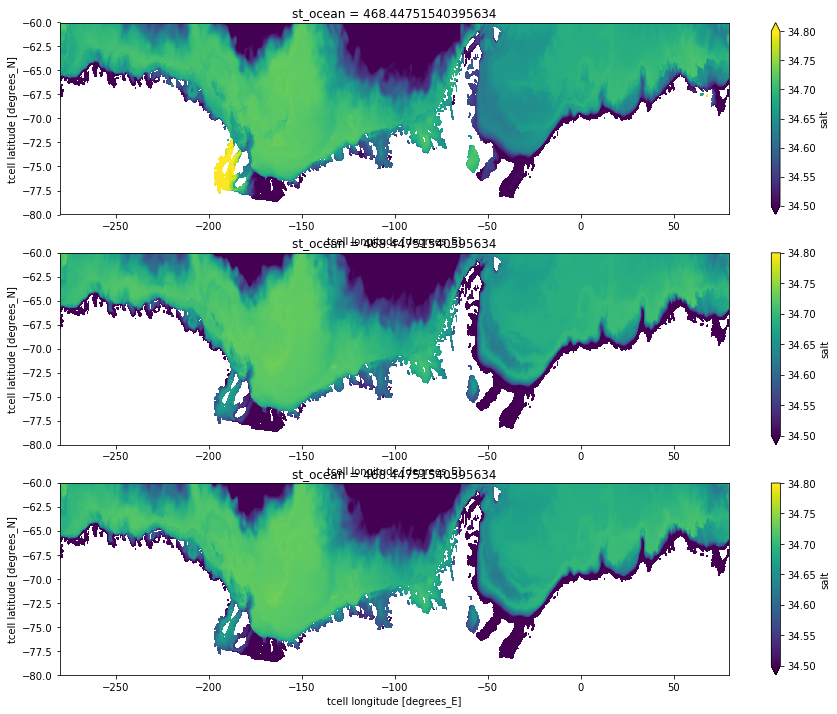

In [11]:
year = 4
print('Calculating salinity for Year ',year)
plt.figure(figsize=(15,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
salt = cc.querying.getvar(expt,'salt',db,n=100).sel(st_ocean = 450,method='nearest')
salt = salt.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
salt=salt.mean('time')
plt.subplot(3,1,ii)
salt.plot(vmin=34.5,vmax=34.8)
for expt in expts:
    ii+=1
    salt = cc.querying.getvar(expt,'salt',db).sel(st_ocean = 450,method='nearest')
    salt = salt.sel(yt_ocean=slice(-80,-60)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    salt = salt.mean('time')
    plt.subplot(3,1,ii)
    salt.plot(vmin=34.5,vmax=34.8)

Calculating salinity for Year  4


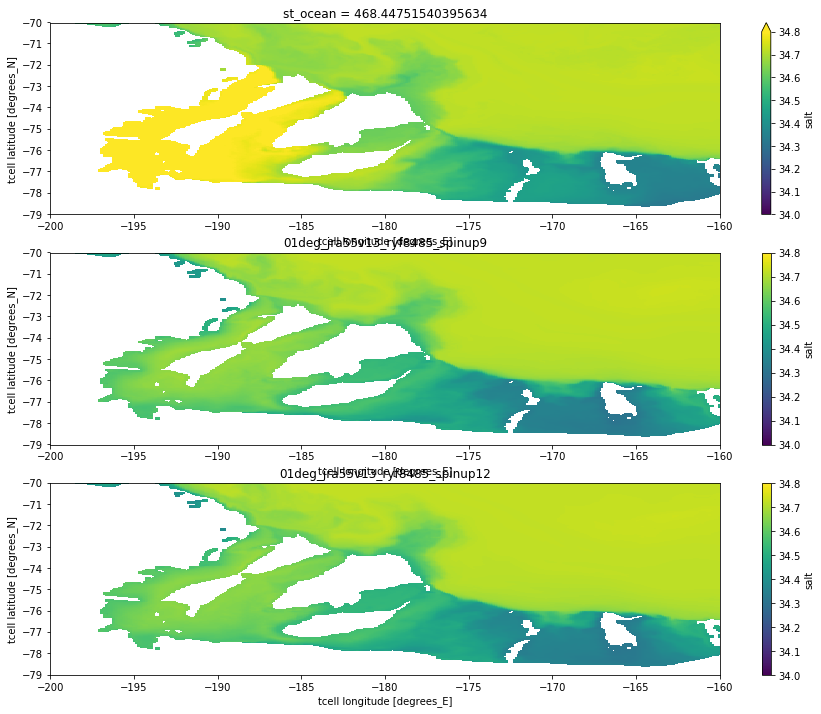

In [4]:
year = 4
expts = [#'01deg_jra55v13_ryf8485_spinup6',
         #'01deg_jra55v13_ryf8485_spinup7',
         '01deg_jra55v13_ryf8485_spinup9',
         #'01deg_jra55v13_ryf8485_spinup10',
         #'01deg_jra55v13_ryf8485_spinup11',
         '01deg_jra55v13_ryf8485_spinup12'
        ]
print('Calculating salinity for Year ',year)
plt.figure(figsize=(15,12))
ii=1

expt='01deg_jra55v13_ryf8485_spinup6'
salt = cc.querying.getvar(expt,'salt',db,n=100).sel(st_ocean = 450,method='nearest')
salt = salt.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
salt=salt.mean('time')
plt.subplot(3,1,ii)
salt.plot(vmin=34,vmax=34.8)

for expt in expts:
    ii+=1
    salt = cc.querying.getvar(expt,'salt',db).sel(st_ocean = 450,method='nearest')
    salt = salt.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    salt = salt.mean('time')
    plt.subplot(3,1,ii)
    s1=salt.plot(vmin=34,vmax=34.8)
    plt.title(expt)
    

Calculating salinity for Year  1945


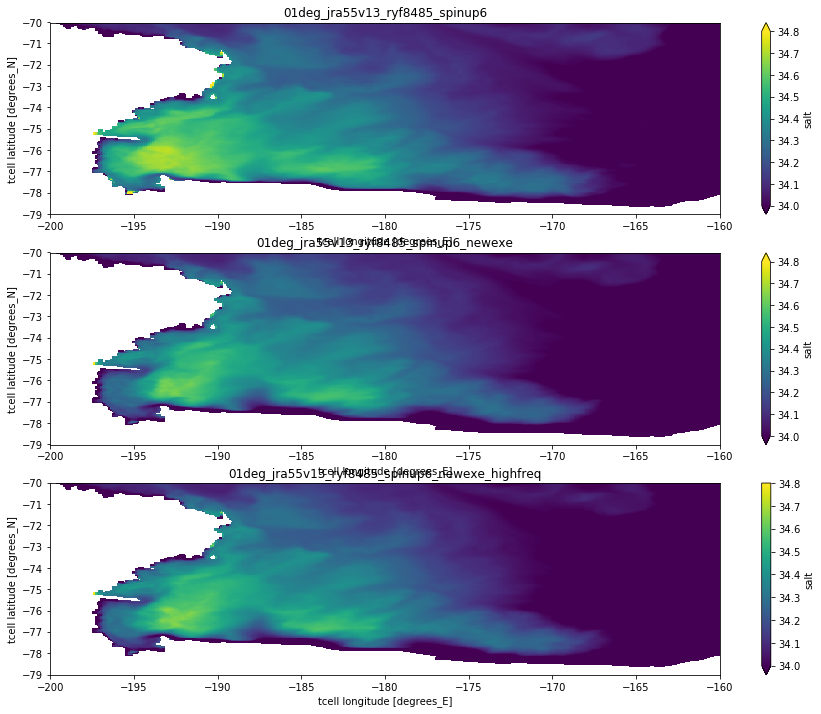

In [5]:
year = 1945
expts = ['01deg_jra55v13_ryf8485_spinup6',
         '01deg_jra55v13_ryf8485_spinup6_newexe',
         '01deg_jra55v13_ryf8485_spinup6_newexe_highfreq',
        ]
print('Calculating salinity for Year ',year)
plt.figure(figsize=(15,12))
ii=0
for expt in expts:
    ii+=1
    salt = cc.querying.getvar(expt,'salt',db,start_time='1945-01-01',end_time='1945-12-31').sel(st_ocean = 10,method='nearest')
    salt = salt.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
    salt = salt.mean('time')
    plt.subplot(3,1,ii)
    s1=salt.plot(vmin=34,vmax=34.8)
    plt.title(expt)


Calculating salinity for Year  1946


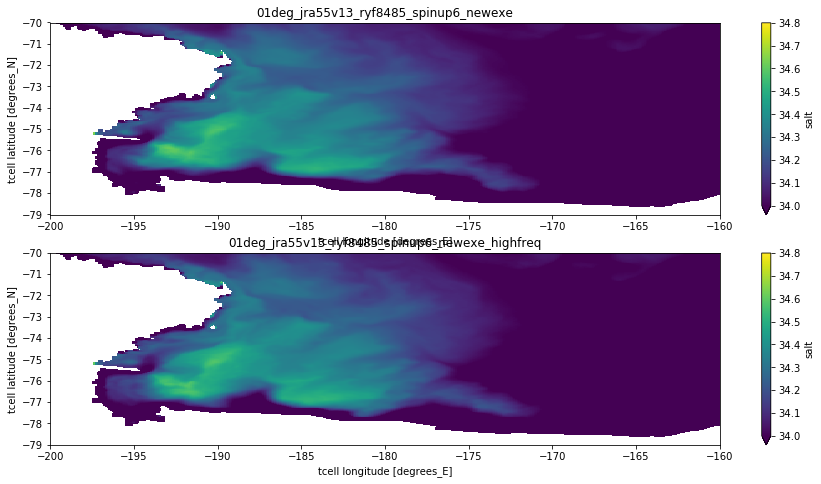

In [6]:
year = 1946
expts = [#'01deg_jra55v13_ryf8485_spinup6',
         '01deg_jra55v13_ryf8485_spinup6_newexe',
         '01deg_jra55v13_ryf8485_spinup6_newexe_highfreq',
        ]
print('Calculating salinity for Year ',year)
plt.figure(figsize=(15,12))
ii=0
for expt in expts:
    ii+=1
    salt = cc.querying.getvar(expt,'salt',db,start_time='1946-01-01',end_time='1946-12-31').sel(st_ocean = 10,method='nearest')
    salt = salt.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
    salt = salt.mean('time')
    plt.subplot(3,1,ii)
    s1=salt.plot(vmin=34,vmax=34.8)
    plt.title(expt)

Calculating PME for Year  1


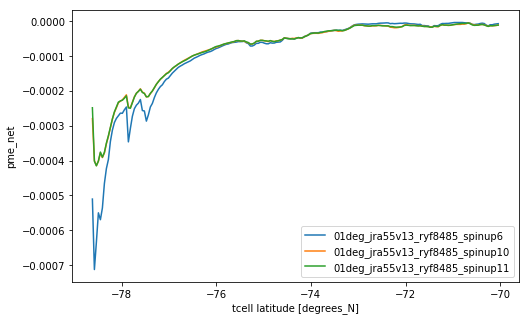

In [30]:
year = 1
print('Calculating PME for Year ',year)
plt.figure(figsize=(8,5))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
pme_net = cc.querying.getvar(expt,'pme_net',db,n=100)
pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
pme_net=pme_net.mean('time').mean('xt_ocean')
#plt.subplot(3,1,ii)
pme_net.plot(label=expt)
for expt in expts:
    ii+=1
    pme_net = cc.querying.getvar(expt,'pme_net',db)
    pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    pme_net = pme_net.mean('time').mean('xt_ocean')
    #plt.subplot(3,1,ii)
    pme_net.plot(label=expt)

plt.legend()

Calculating PME for Year  4


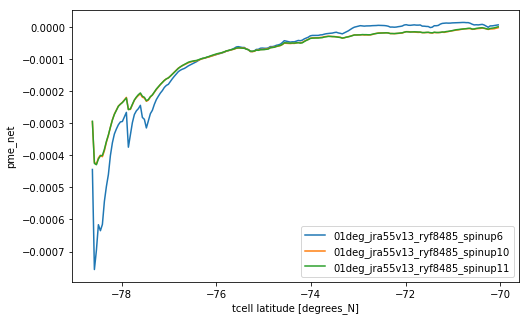

In [31]:
year = 4
print('Calculating PME for Year ',year)
plt.figure(figsize=(8,5))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
pme_net = cc.querying.getvar(expt,'pme_net',db,n=100)
pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,12,31)))
pme_net=pme_net.mean('time').mean('xt_ocean')
#plt.subplot(3,1,ii)
pme_net.plot(label=expt)
for expt in expts:
    ii+=1
    pme_net = cc.querying.getvar(expt,'pme_net',db)
    pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,12,31)))
    pme_net = pme_net.mean('time').mean('xt_ocean')
    #plt.subplot(3,1,ii)
    pme_net.plot(label=expt)

plt.legend()

Calculating PME for summer, Year  4


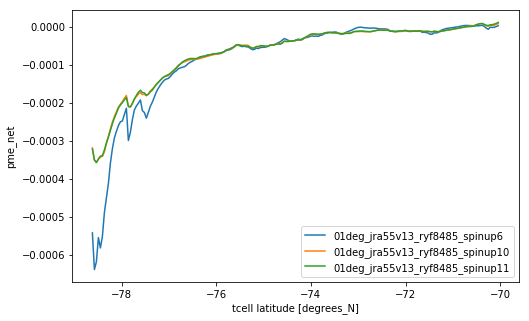

In [34]:
year = 4
print('Calculating PME for summer, Year ',year)
plt.figure(figsize=(8,5))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
pme_net = cc.querying.getvar(expt,'pme_net',db,n=100)
pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,1,1),cftime.DatetimeNoLeap(year,5,31)))
pme_net=pme_net.mean('time').mean('xt_ocean')
#plt.subplot(3,1,ii)
pme_net.plot(label=expt)
for expt in expts:
    ii+=1
    pme_net = cc.querying.getvar(expt,'pme_net',db)
    pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,1,1),cftime.DatetimeNoLeap(1899+year,5,31)))
    pme_net = pme_net.mean('time').mean('xt_ocean')
    #plt.subplot(3,1,ii)
    pme_net.plot(label=expt)

plt.legend()

Calculating PME for winter, Year  4


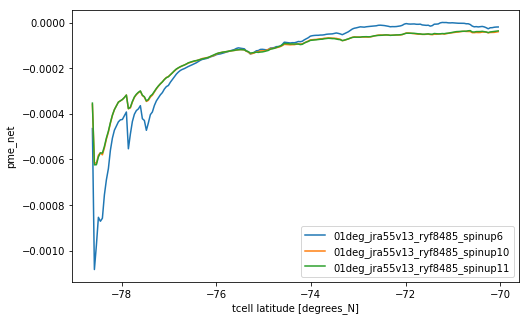

In [4]:
year = 4
print('Calculating PME for winter, Year ',year)
plt.figure(figsize=(8,5))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
pme_net = cc.querying.getvar(expt,'pme_net',db,n=100)
pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(year,6,1),cftime.DatetimeNoLeap(year,10,31)))
pme_net=pme_net.mean('time').mean('xt_ocean')
#plt.subplot(3,1,ii)
pme_net.plot(label=expt)
for expt in expts:
    ii+=1
    pme_net = cc.querying.getvar(expt,'pme_net',db)
    pme_net = pme_net.sel(yt_ocean=slice(-79,-70)).sel(xt_ocean=slice(-200,-160)).sel(time=slice(cftime.DatetimeNoLeap(1899+year,6,1),cftime.DatetimeNoLeap(1899+year,10,31)))
    pme_net = pme_net.mean('time').mean('xt_ocean')
    #plt.subplot(3,1,ii)
    pme_net.plot(label=expt)

plt.legend()

Calculating ice for Year  1


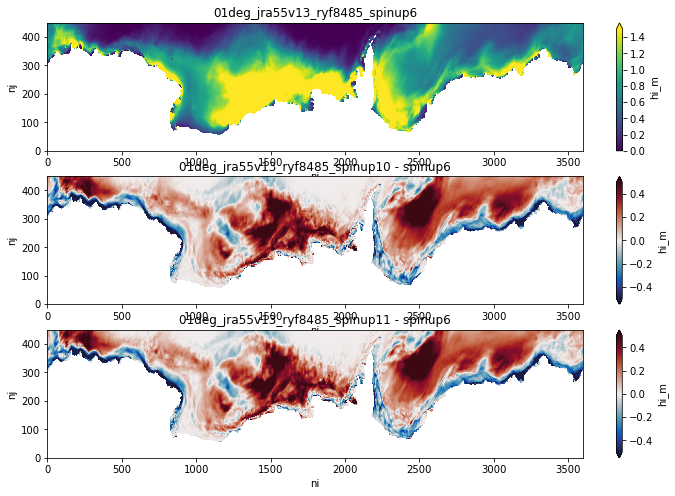

In [16]:
year = 1
print('Calculating ice for Year ',year)
plt.figure(figsize=(12,8))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
hi_m = cc.querying.getvar(expt,'hi_m',db,start_time='0001-1-1',end_time='0001-12-31').isel(nj=slice(None,450))
hi_m_spinup6=hi_m.mean('time')
plt.subplot(3,1,ii)
hi_m_spinup6.plot(vmin=0,vmax=1.5)
plt.title(expt)
for expt in expts:
    ii+=1
    hi_m = cc.querying.getvar(expt,'hi_m',db,start_time='1900-1-1',end_time='1900-12-31').isel(nj=slice(None,450))
    hi_m=hi_m.mean('time') - hi_m_spinup6
    plt.subplot(3,1,ii)
    hi_m.plot(vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)
    plt.title(expt+' - spinup6')

Calculating ice for Year  4


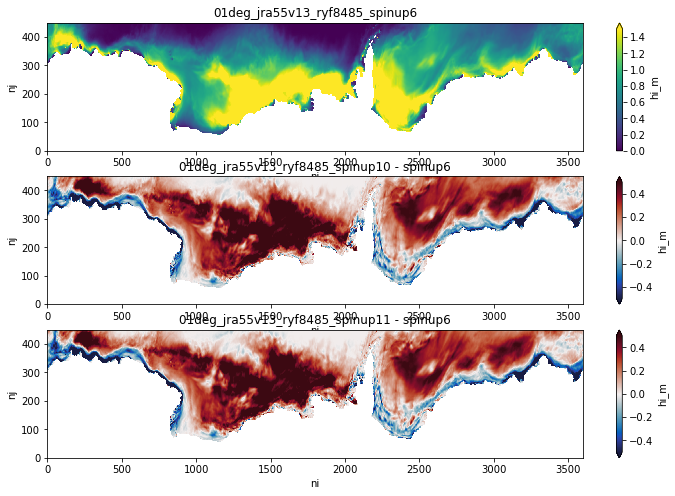

In [15]:
year = 4
print('Calculating ice for Year ',year)
plt.figure(figsize=(12,8))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
hi_m = cc.querying.getvar(expt,'hi_m',db,start_time='0004-1-1',end_time='0004-12-31').isel(nj=slice(None,450))
hi_m_spinup6=hi_m.mean('time')
plt.subplot(3,1,ii)
hi_m_spinup6.plot(vmin=0,vmax=1.5)
plt.title(expt)
for expt in expts:
    ii+=1
    hi_m = cc.querying.getvar(expt,'hi_m',db,start_time='1903-1-1',end_time='1903-12-31').isel(nj=slice(None,450))
    hi_m=hi_m.mean('time') - hi_m_spinup6
    plt.subplot(3,1,ii)
    hi_m.plot(vmin=-0.5,vmax=0.5,cmap=cm.cm.balance)
    plt.title(expt+' - spinup6')

Calculating ice for Year  4


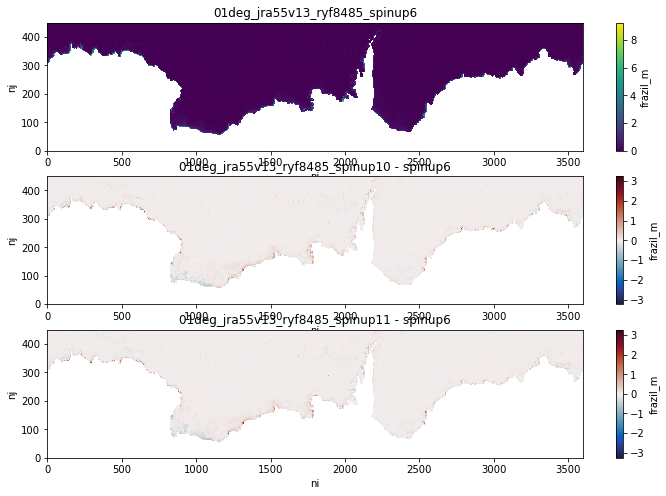

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 867, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 500, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140594249115392 and this is thread id 140592801642240.
Exception closing connection <sqlite3.Connection object at 0x7fde6184c2d0>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/

In [19]:
year = 4
print('Calculating ice for Year ',year)
plt.figure(figsize=(12,8))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
hi_m = cc.querying.getvar(expt,'frazil_m',db,start_time='0018-1-1',end_time='0018-12-31').isel(nj=slice(None,450))
hi_m_spinup6=hi_m.mean('time')
plt.subplot(3,1,ii)
hi_m_spinup6.plot()
plt.title(expt)
for expt in expts:
    ii+=1
    hi_m = cc.querying.getvar(expt,'frazil_m',db,start_time='1903-1-1',end_time='1903-12-31').isel(nj=slice(None,450))
    hi_m=hi_m.mean('time') - hi_m_spinup6
    plt.subplot(3,1,ii)
    hi_m.plot(cmap=cm.cm.balance)
    plt.title(expt+' - spinup6')

Calculating ice for Year  4


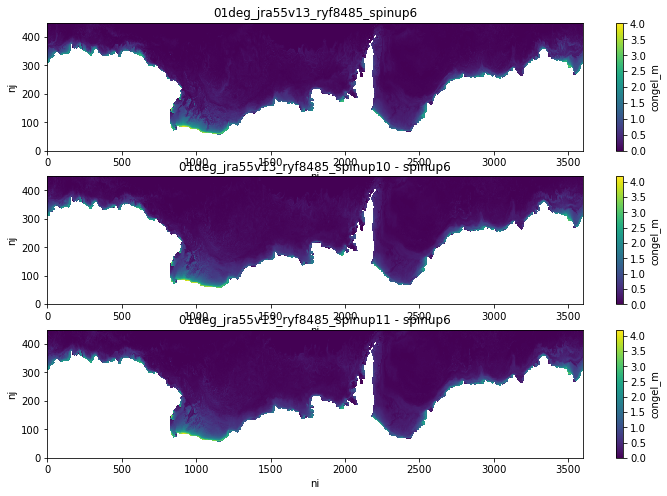

In [29]:
year = 4
print('Calculating ice for Year ',year)
plt.figure(figsize=(12,8))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
hi_m = cc.querying.getvar(expt,'congel_m',db,start_time='0018-1-1',end_time='0018-12-31').isel(nj=slice(None,450))
hi_m_spinup6=hi_m.mean('time')
plt.subplot(3,1,ii)
hi_m_spinup6.plot()
plt.title(expt)
for expt in expts:
    ii+=1
    hi_m = cc.querying.getvar(expt,'congel_m',db,start_time='1903-1-1',end_time='1903-12-31').isel(nj=slice(None,450))
    hi_m=hi_m.mean('time')# - hi_m_spinup6
    plt.subplot(3,1,ii)
    hi_m.plot()
    plt.title(expt+' - spinup6')

Text(0.5,1,'diff')

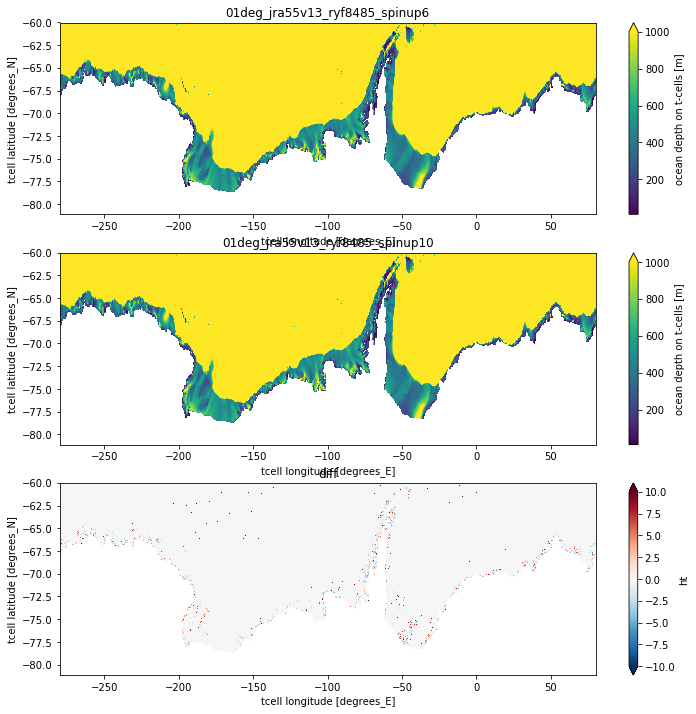

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 680, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 867, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 500, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140594249115392 and this is thread id 140592801642240.
Exception closing connection <sqlite3.Connection object at 0x7fde6171eb90>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/sqlalchemy/

In [26]:

plt.figure(figsize=(12,12))
ii=1
expt='01deg_jra55v13_ryf8485_spinup6'
ht6 = cc.querying.getvar(expt,'ht',db,n=1).sel(yt_ocean = slice(None,-60))
plt.subplot(3,1,ii)
ht.plot(vmax=1000)
plt.title(expt)


expt='01deg_jra55v13_ryf8485_spinup10'
ht10 = cc.querying.getvar(expt,'ht',db,n=1).sel(yt_ocean = slice(None,-60))
plt.subplot(3,1,2)
ht.plot(vmax=1000)
plt.title(expt)


htdiff = ht10-ht6
plt.subplot(3,1,3)
htdiff.plot(vmax=10)
plt.title('diff')

#for expt in expts:
#    ii+=1
#    hi_m = cc.querying.getvar(expt,'frazil_m',db,start_time='1903-1-1',end_time='1903-12-31').isel(nj=slice(None,450))
#    hi_m=hi_m.mean('time') - hi_m_spinup6
#    plt.subplot(3,1,ii)
#    hi_m.plot(cmap=cm.cm.balance)
#    plt.title(expt+' - spinup6')